<a href="https://colab.research.google.com/github/Manasa-01/cs666student/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

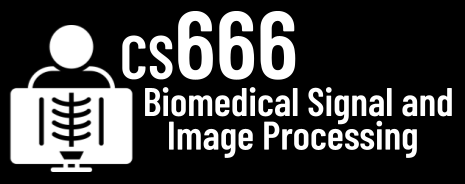

# Assignment 1

In [61]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [62]:
!pip install biosppy

**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [63]:
from biosppy import storage
signal, metadata = storage.load_txt('/content/ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [64]:
SAMPLING_RATE = 1000 ### TODO!
SECONDS = len(signal)/SAMPLING_RATE ### TODO!

In [65]:
SECONDS

15.0

**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

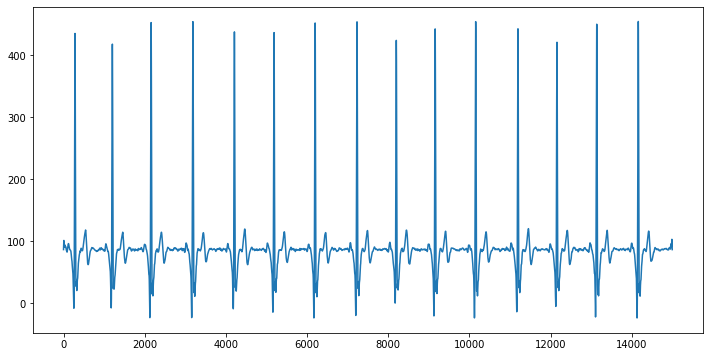

In [66]:
### TODO
import matplotlib.pyplot as plt
from biosppy.signals import ecg
samplefrequency = metadata['sampling_rate']
biosppy_ECG_signal= ecg.ecg(signal=signal, sampling_rate=samplefrequency, show=False)
plt.figure(figsize=(12, 6)) #for clear visible of spikes of the signal
plt.plot(biosppy_ECG_signal['filtered'])

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

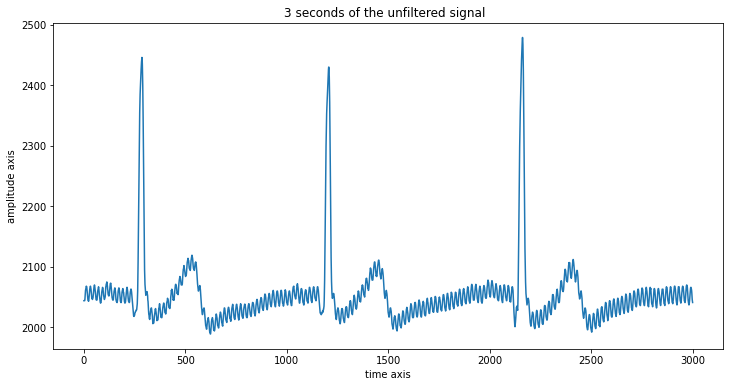

In [67]:
### TODO plot unfiltered signal
seconds= 3
biosppy_ECG_signal_3sec= signal[0:seconds*SAMPLING_RATE]
plt.figure(figsize=(12, 6)) #for clear visible of spikes of the signal
plt.plot(biosppy_ECG_signal_3sec)
plt.xlabel('time axis')
plt.ylabel('amplitude axis')
plt.title('3 seconds of the unfiltered signal  ')
plt.show()


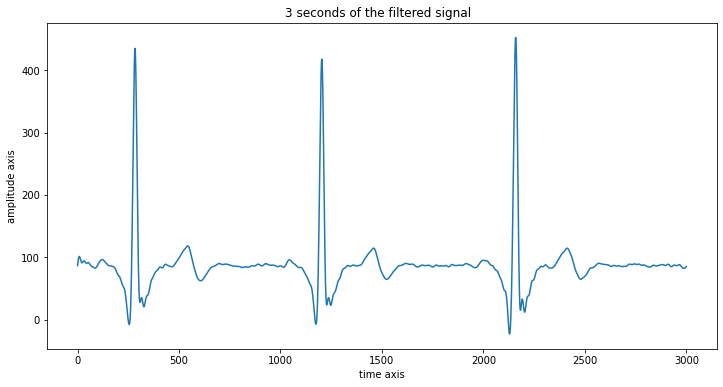

In [68]:
### TODO plot filtered signal
seconds= 3
output= biosppy_ECG_signal['filtered'][0:seconds*SAMPLING_RATE]
plt.figure(figsize=(12, 6)) #for clear visible of spikes of the signal
plt.plot(output )
plt.xlabel('time axis')
plt.ylabel('amplitude axis')
plt.title('3 seconds of the filtered signal  ')
plt.show()


**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

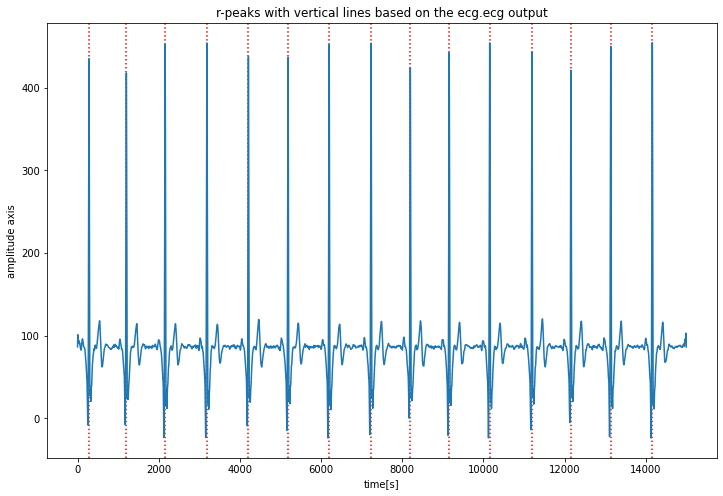

In [69]:
vertical_rpeaks = biosppy_ECG_signal['rpeaks']
plt.figure(figsize=(12,8)) #for clear visible of spikes of the signal
for R in vertical_rpeaks:
    plt.axvline(x=[R], color='r', ls=':')
plt.plot(biosppy_ECG_signal['filtered'])
plt.xlabel('time[s]')
plt.ylabel('amplitude axis')
plt.title('r-peaks with vertical lines based on the ecg.ecg output')
plt.show()




**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [70]:
!pip install neurokit2
import neurokit2 as nk

**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


(-0.4, 0.6)

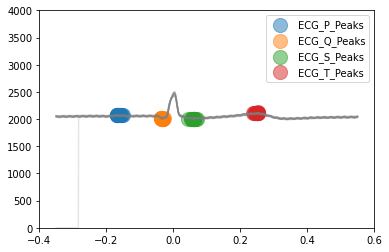

In [72]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method
import neurokit2 as nk
_, PQSTwave_peaks = nk.ecg_delineate(signal, 
                                 vertical_rpeaks, 
                                 sampling_rate=samplefrequency, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')
plt.ylim(0,4000)
plt.xlim(-0.4,0.6)

In [ ]:
# TODO Does the detection work well?


Yes, the detection worked well.

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

Text(0.5, 1.0, 'P Q S T Peaks up to two spikes of the unfiltered signal')

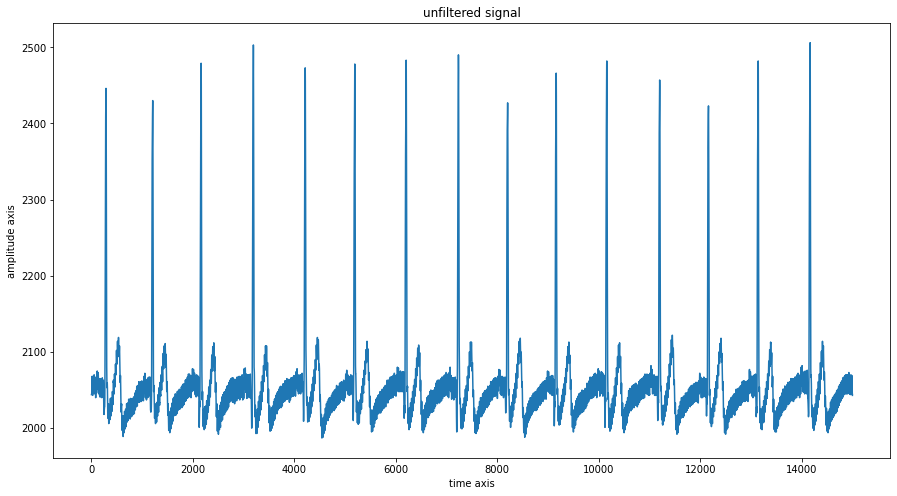

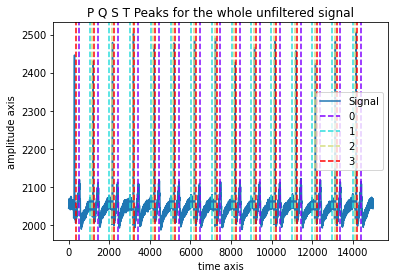

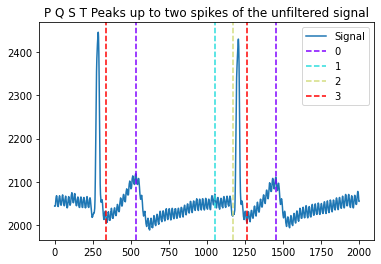

In [76]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
_, PQST_whole = nk.ecg_delineate(signal, vertical_rpeaks, sampling_rate=samplefrequency, method="peak")
plt.figure(figsize=(15,8)) #for clear visible of spikes of the signal
plt.plot(signal)
plt.title('unfiltered signal')
plt.xlabel('time axis')
plt.ylabel('amplitude axis')


plot = nk.events_plot([PQST_whole['ECG_T_Peaks'], 
                       PQST_whole['ECG_P_Peaks'],
                       PQST_whole['ECG_Q_Peaks'],
                       PQST_whole['ECG_S_Peaks']], signal)
plt.xlabel('time axis')
plt.ylabel('amplitude axis')
plt.title('P Q S T Peaks for the whole unfiltered signal')



plot = nk.events_plot([PQST_whole['ECG_T_Peaks'][:2],
                       PQST_whole['ECG_P_Peaks'][:2],
                       PQST_whole['ECG_Q_Peaks'][:2],
                       PQST_whole['ECG_S_Peaks'][:2]], signal[:2000])
plt.title('P Q S T Peaks up to two spikes of the unfiltered signal')

Text(0.5, 1.0, 'P Q S T Peaks up to two spikes of the filtered signal')

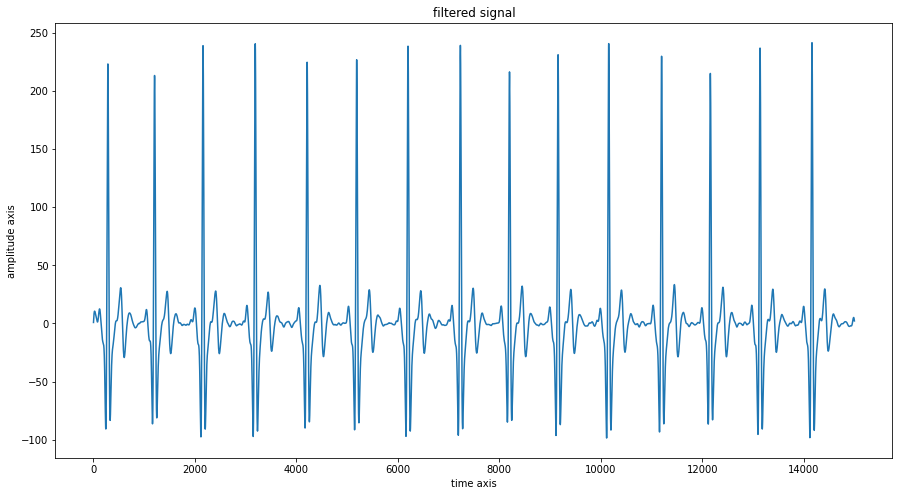

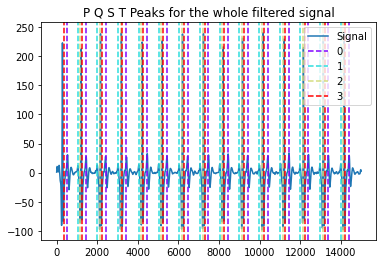

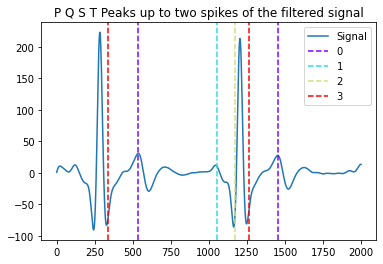

In [75]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.
# Finally, run the delineation on the filtered signal from BioSPPY.

filtered_nk_signal= nk.signal_filter(signal, lowcut=4, highcut=17, sampling_rate=samplefrequency)
plt.figure(figsize=(15,8)) #for clear visible of spikes of the signal
plt.plot(filtered_nk_signal)
plt.title('filtered signal')
plt.xlabel('time axis')
plt.ylabel('amplitude axis')

_, PQST_whole = nk.ecg_delineate(signal, vertical_rpeaks, sampling_rate=samplefrequency, method="peak")
plot = nk.events_plot([PQST_whole['ECG_T_Peaks'],
                       PQST_whole['ECG_P_Peaks'],
                       PQST_whole['ECG_Q_Peaks'],
                       PQST_whole['ECG_S_Peaks']], filtered_nk_signal)
plt.title('P Q S T Peaks for the whole filtered signal')

plot = nk.events_plot([PQST_whole['ECG_T_Peaks'][:2],
                       PQST_whole['ECG_P_Peaks'][:2],
                       PQST_whole['ECG_Q_Peaks'][:2],
                       PQST_whole['ECG_S_Peaks'][:2]], filtered_nk_signal[:2000])
plt.title('P Q S T Peaks up to two spikes of the filtered signal')

# Lowercut= 4 and highercut=17 works well as I got the smoothened filtered signal which is similar to the original signal.
# So, this values of lowercut and highercut worked well for me. 

In [ ]:
# TODO Which one works the best?

P Q R S T peaks detection of the filtered signals using biosppy and neurokit are accurate. However, it is inaccurate when there is more noise in the signal(unfiltered).

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#